In [1]:
import os

# Define the base directory where your "pizza_not_pizza" folder is located
base_dir = 'pizza_not_pizza'

# Define the subfolder names
train_folder = 'Train'
validation_folder = 'Validation'
test_folder = 'Test'

# Define the class names (subfolders within Train, Validation, and Test)
class_names = ['pizza', 'not_pizza']

# Define the directories for training, validation, and test datasets
train_dir = os.path.join(base_dir, train_folder)
validation_dir = os.path.join(base_dir, validation_folder)
test_dir = os.path.join(base_dir, test_folder)

# Function to count the number of images in a directory
def count_images(directory):
    return len([file for file in os.listdir(directory) if file.endswith('.jpg') or file.endswith('.png')])

# Create directories for each class within training, validation, and test
train_pizza_dir = os.path.join(train_dir, class_names[0])
train_not_pizza_dir = os.path.join(train_dir, class_names[1])

validation_pizza_dir = os.path.join(validation_dir, class_names[0])
validation_not_pizza_dir = os.path.join(validation_dir, class_names[1])

test_pizza_dir = os.path.join(test_dir, class_names[0])
test_not_pizza_dir = os.path.join(test_dir, class_names[1])

# Get image counts
train_pizza_count = count_images(train_pizza_dir)
train_not_pizza_count = count_images(train_not_pizza_dir)

validation_pizza_count = count_images(validation_pizza_dir)
validation_not_pizza_count = count_images(validation_not_pizza_dir)

test_pizza_count = count_images(test_pizza_dir)
test_not_pizza_count = count_images(test_not_pizza_dir)

# Print the directories and image counts
print("Training directory:", train_dir)
print("  - Pizza:", train_pizza_dir, "(", train_pizza_count, " images)")
print("  - Not Pizza:", train_not_pizza_dir, "(", train_not_pizza_count, " images)")

print("\nValidation directory:", validation_dir)
print("  - Pizza:", validation_pizza_dir, "(", validation_pizza_count, " images)")
print("  - Not Pizza:", validation_not_pizza_dir, "(", validation_not_pizza_count, " images)")

print("\nTest directory:", test_dir)
print("  - Pizza:", test_pizza_dir, "(", test_pizza_count, " images)")
print("  - Not Pizza:", test_not_pizza_dir, "(", test_not_pizza_count, " images)")


Training directory: pizza_not_pizza\Train
  - Pizza: pizza_not_pizza\Train\pizza ( 688  images)
  - Not Pizza: pizza_not_pizza\Train\not_pizza ( 688  images)

Validation directory: pizza_not_pizza\Validation
  - Pizza: pizza_not_pizza\Validation\pizza ( 147  images)
  - Not Pizza: pizza_not_pizza\Validation\not_pizza ( 147  images)

Test directory: pizza_not_pizza\Test
  - Pizza: pizza_not_pizza\Test\pizza ( 148  images)
  - Not Pizza: pizza_not_pizza\Test\not_pizza ( 148  images)


In [2]:
import os

base_dir = 'pizza_not_pizza'

if os.access(base_dir, os.R_OK):
    print("Read access granted.")
else:
    print("Read access denied.")


Read access granted.


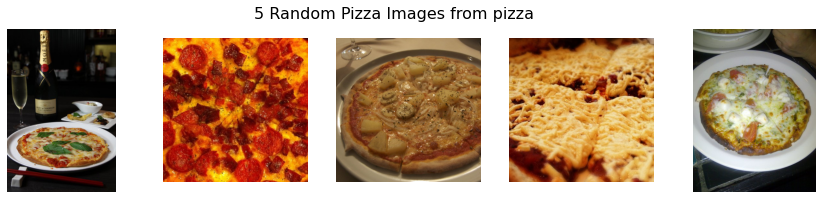

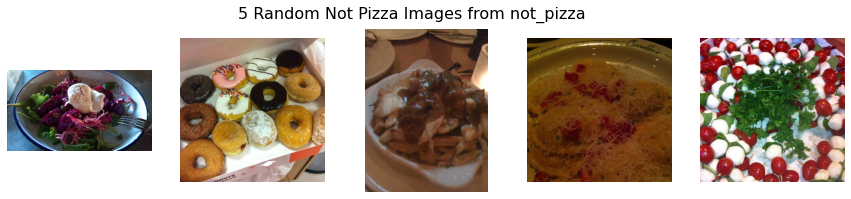

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Function to display images
def show_images(directory, class_name, num_images=5):
    # Get a list of image files in the directory
    image_files = [file for file in os.listdir(directory) if file.endswith('.jpg') or file.endswith('.png')]
    
    # Select a random sample of images
    selected_images = random.sample(image_files, min(num_images, len(image_files)))
    
    # Display the selected images
    plt.figure(figsize=(15, 3))
    plt.suptitle(f"{num_images} Random {class_name} Images from {os.path.basename(directory)}", fontsize=16)
    
    for i, image_file in enumerate(selected_images):
        img_path = os.path.join(directory, image_file)
        plt.subplot(1, num_images, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

# Display 5 random pizza images and 5 random not_pizza images from the training set
show_images(train_pizza_dir, 'Pizza', num_images=5)
show_images(train_not_pizza_dir, 'Not Pizza', num_images=5)


In [4]:
from keras.preprocessing.image import ImageDataGenerator

# Define image data generators with data augmentation for the train set
train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalize pixel values to be between 0 and 1
    rotation_range=20,     # randomly rotate images in the range (degrees)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2, # randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # shear intensity (shear angle in radians)
    zoom_range=0.2,         # randomly zoom into images
    horizontal_flip=True,   # randomly flip images horizontally
    fill_mode='nearest'     # fill mode for filling in newly created pixels
)

# Define image data generators without data augmentation for the validation and test sets
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Create image data generators for the train, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # resize images to (150, 150)
    batch_size=32,
    class_mode='binary'      # binary classification (pizza or not_pizza)
)

validation_generator = validation_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = validation_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1376 images belonging to 2 classes.
Found 294 images belonging to 2 classes.
Found 296 images belonging to 2 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
from keras.callbacks import ModelCheckpoint

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # You may adjust the number of epochs based on your dataset
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint]
)

# Load the best model saved during training
model.load_weights('best_model.h5')

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_generator, steps=len(train_generator))
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Training Loss: {train_loss:.4f}')

# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')
print(f'Validation Loss: {validation_loss:.4f}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


Epoch 1/10
43/43 [==============================] - 59s 1s/step - loss: 0.7353 - accuracy: 0.5385 - val_loss: 0.6857 - val_accuracy: 0.5272
Epoch 2/10
43/43 [==============================] - 51s 1s/step - loss: 0.6526 - accuracy: 0.6257 - val_loss: 0.5762 - val_accuracy: 0.7177
Epoch 3/10
43/43 [==============================] - 51s 1s/step - loss: 0.6277 - accuracy: 0.6577 - val_loss: 0.5873 - val_accuracy: 0.7007
Epoch 4/10
43/43 [==============================] - 50s 1s/step - loss: 0.6033 - accuracy: 0.6904 - val_loss: 0.5802 - val_accuracy: 0.6803
Epoch 5/10
43/43 [==============================] - 51s 1s/step - loss: 0.6057 - accuracy: 0.6911 - val_loss: 0.5792 - val_accuracy: 0.7517
Epoch 6/10
43/43 [==============================] - 51s 1s/step - loss: 0.5684 - accuracy: 0.7158 - val_loss: 0.5221 - val_accuracy: 0.7585
Epoch 7/10
43/43 [==============================] - 50s 1s/step - loss: 0.5512 - accuracy: 0.7260 - val_loss: 0.5645 - val_accuracy: 0.7279
Epoch 8/10
43/43 [==

1/1 [==============================] - 0s 455ms/step


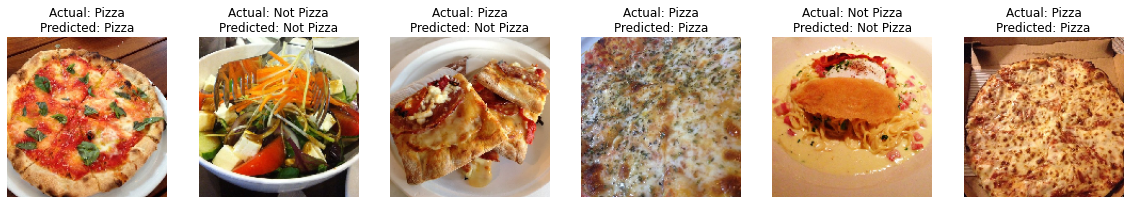

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Function to make predictions and visualize results
def visualize_predictions(generator, num_images=5):
    # Get a batch of test data and labels
    test_data, test_labels = generator.next()

    # Make predictions
    predictions = model.predict(test_data)

    # Convert binary predictions to class labels (0 or 1)
    predicted_labels = np.round(predictions).astype(int)

    # Class names
    class_names = ['Not Pizza', 'Pizza']

    # Visualize the results
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)

        # Display the image
        img = test_data[i]
        plt.imshow(img)
        plt.axis('off')

        # Set the title with the actual and predicted class
        actual_class = class_names[int(test_labels[i])]
        predicted_class = class_names[predicted_labels[i][0]]
        title = f'Actual: {actual_class}\nPredicted: {predicted_class}'

        # Display the title
        plt.title(title, fontsize=12)

    plt.show()

# Visualize predictions on the test set
visualize_predictions(test_generator, num_images=6)


In [8]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense
from keras.callbacks import ModelCheckpoint

def residual_block(x, filters, kernel_size=3, stride=1):
    # Shortcut
    shortcut = x

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(kernel_size, kernel_size), strides=(stride, stride), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(kernel_size, kernel_size), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    shortcut = Conv2D(filters, kernel_size=(1, 1), strides=(stride, stride), padding='valid')(shortcut)
    shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

def build_resnet(input_shape):
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)

    x = residual_block(x, filters=128, stride=2)
    x = residual_block(x, filters=128)

    x = residual_block(x, filters=256, stride=2)
    x = residual_block(x, filters=256)

    x = GlobalAveragePooling2D()(x)
    x = Dense(1, activation='sigmoid')(x)  # Binary classification

    model = Model(inputs=input_tensor, outputs=x)
    return model

# Assuming you have the data generators created earlier (train_generator, validation_generator, test_generator)

# Build ResNet model for binary classification
resnet_model_binary = build_resnet(input_shape)



NameError: name 'input_shape' is not defined

In [9]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense

def residual_block(x, filters, kernel_size=3, stride=1):
    # Shortcut
    shortcut = x

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(kernel_size, kernel_size), strides=(stride, stride), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(kernel_size, kernel_size), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    shortcut = Conv2D(filters, kernel_size=(1, 1), strides=(stride, stride), padding='valid')(shortcut)
    shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

def build_resnet(input_shape, num_classes):
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)

    x = residual_block(x, filters=128, stride=2)
    x = residual_block(x, filters=128)

    x = residual_block(x, filters=256, stride=2)
    x = residual_block(x, filters=256)

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Adjust the input shape based on your images
num_classes = 2  # Assuming binary classification (pizza or not_pizza)

# Build ResNet model
resnet_model_binary = build_resnet(input_shape, num_classes)


# Display the model summary
resnet_model_binary.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 112, 112, 64  256        ['conv2d_3[0][0]']               
 alization)                     )                                                             

In [10]:
# Compile the ResNet model for binary classification
resnet_model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up a checkpoint to save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_resnet_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Train the model with the checkpoint callback
history_resnet_binary = resnet_model_binary.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint]
)

# Load the best model saved during training
resnet_model_binary.load_weights('best_resnet_model.h5')

# Evaluate the best model on the training set
train_loss_resnet_binary, train_accuracy_resnet_binary = resnet_model_binary.evaluate(train_generator, steps=len(train_generator))
print(f'Best ResNet Binary Training Accuracy: {train_accuracy_resnet_binary * 100:.2f}%')
print(f'Best ResNet Binary Training Loss: {train_loss_resnet_binary:.4f}')

# Evaluate the best model on the validation set
validation_loss_resnet_binary, validation_accuracy_resnet_binary = resnet_model_binary.evaluate(validation_generator, steps=len(validation_generator))
print(f'Best ResNet Binary Validation Accuracy: {validation_accuracy_resnet_binary * 100:.2f}%')
print(f'Best ResNet Binary Validation Loss: {validation_loss_resnet_binary:.4f}')

# Evaluate the best model on the test set
test_loss_resnet_binary, test_accuracy_resnet_binary = resnet_model_binary.evaluate(test_generator, steps=len(test_generator))
print(f'Best ResNet Binary Test Accuracy: {test_accuracy_resnet_binary * 100:.2f}%')
print(f'Best ResNet Binary Test Loss: {test_loss_resnet_binary:.4f}')


Epoch 1/10


ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 2156, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\user\anaconda3\lib\site-packages\keras\backend.py", line 5707, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

# Assuming you have train_generator, validation_generator, and test_generator defined earlier

# Compile the model
resnet_model_binary.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('resnet_best_model.h5', save_best_only=True)

# Train the model
history_resnet = resnet_model_binary.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # You may adjust the number of epochs based on your dataset
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint]
)

# Load the best model saved during training
resnet_model_binary.load_weights('resnet_best_model.h5')

# Evaluate the model on the training set
train_loss, train_accuracy = resnet_model_binary.evaluate(train_generator, steps=len(train_generator))
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Training Loss: {train_loss:.4f}')

# Evaluate the model on the validation set
validation_loss, validation_accuracy = resnet_model_binary.evaluate(validation_generator, steps=len(validation_generator))
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')
print(f'Validation Loss: {validation_loss:.4f}')

# Evaluate the model on the test set
test_loss, test_accuracy = resnet_model_binary.evaluate(test_generator, steps=len(test_generator))
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


Epoch 1/10
43/43 [==============================] - 212s 5s/step - loss: 0.4756 - accuracy: 0.7856 - val_loss: 1.0204 - val_accuracy: 0.7381
Epoch 2/10
43/43 [==============================] - 196s 5s/step - loss: 0.4336 - accuracy: 0.7965 - val_loss: 1.0950 - val_accuracy: 0.6088
Epoch 3/10
43/43 [==============================] - 206s 5s/step - loss: 0.4134 - accuracy: 0.8198 - val_loss: 0.4388 - val_accuracy: 0.8027
Epoch 4/10
43/43 [==============================] - 196s 5s/step - loss: 0.4125 - accuracy: 0.8081 - val_loss: 1.3518 - val_accuracy: 0.7007
Epoch 5/10
43/43 [==============================] - 182s 4s/step - loss: 0.3788 - accuracy: 0.8430 - val_loss: 0.4188 - val_accuracy: 0.8367
Epoch 6/10
43/43 [==============================] - 183s 4s/step - loss: 0.4100 - accuracy: 0.8227 - val_loss: 0.4736 - val_accuracy: 0.8095
Epoch 7/10
43/43 [==============================] - 188s 4s/step - loss: 0.4090 - accuracy: 0.8176 - val_loss: 2.0546 - val_accuracy: 0.5000
Epoch 8/10
43

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Function to make predictions and visualize results
def visualize_predictions(resnet_model_binary, generator, num_images=5):
    # Get a batch of test data and labels
    test_data, test_labels = generator.next()

    # Make predictions
    predictions = resnet_model_binary.predict(test_data)

    # Convert binary predictions to class labels (0 or 1)
    predicted_labels = np.round(predictions).astype(int)

    # Class names
    class_names = ['Not Pizza', 'Pizza']

    # Visualize the results
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)

        # Display the image
        img = test_data[i]
        plt.imshow(img)
        plt.axis('off')

        # Set the title with the actual and predicted class
        actual_class = class_names[int(test_labels[i])]
        predicted_class = class_names[predicted_labels[i][0]]
        title = f'Actual: {actual_class}\nPredicted: {predicted_class}'

        # Display the title
        plt.title(title, fontsize=10)

    plt.show()

# Visualize predictions on the test set using the best ResNet model
visualize_predictions(resnet_model_binary, test_generator, num_images=5)


ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 150, 150, 3)


In [16]:
# Assuming you have a test generator (test_generator) created earlier
# The test generator should be configured to load images from the test directory

# Make predictions on the test set
predictions = resnet_model_binary.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert the predicted probabilities to class labels (0 or 1)
predicted_labels = np.round(predictions).astype(int)

# Display the predicted labels
print(predicted_labels)


10/10 [==============================] - 14s 1s/step
[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Assuming you have a test generator (test_generator) created earlier
# The test generator should be configured to load images from the test directory

# Make predictions on the test set
predictions = resnet_model_binary.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert the predicted probabilities to class labels (0 or 1)
predicted_labels = np.round(predictions).astype(int)

# Retrieve actual labels and filenames from the test generator
true_labels = test_generator.classes
filenames = test_generator.filenames

# Display actual and predicted labels along with images
num_images_to_display = 5

for i in range(num_images_to_display):
    # Load and preprocess the image
    img_path = train_dir + filenames[i]  # Replace with the path to your test directory
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction
    prediction = resnet_model_binary.predict(img_array)
    predicted_label = np.round(prediction).astype(int)[0][0]

    # Display the image with actual and predicted labels
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Actual: {true_labels[i]}, Predicted: {predicted_label}')
    plt.show()


10/10 [==============================] - 14s 1s/step


AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Assuming you have a test generator (test_generator) created earlier
# The test generator should be configured to load images from the test directory

# Make predictions on the test set
predictions = resnet_model_binary.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert the predicted probabilities to class labels (0 or 1)
predicted_labels = np.round(predictions).astype(int)

# Retrieve actual labels and filenames from the test generator
true_labels = test_generator.classes
filenames = test_generator.filenames

# Display actual and predicted labels along with images
num_images_to_display = 5

for i in range(num_images_to_display):
    # Load and preprocess the image using PIL
    img_path = test_dir + filenames[i]  # Replace with the path to your test directory
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Ensure the image size matches the input shape
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction
    prediction = resnet_model_binary.predict(img_array)
    predicted_label = np.round(prediction).astype(int)[0][0]

    # Display the image with actual and predicted labels
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Actual: {true_labels[i]}, Predicted: {predicted_label}')
    plt.show()


10/10 [==============================] - 14s 1s/step


FileNotFoundError: [Errno 2] No such file or directory: 'pizza_not_pizza\\Testnot_pizza\\2573880.jpg'